In [2]:
! pip install 'cebra[dev,demos]' 

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: No such file or directory
/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: exec: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: cannot execute: No such file or directory


In [3]:
import sys
import os # my addtion

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import cebra.datasets
from cebra import CEBRA
import torch

from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score


from matplotlib.collections import LineCollection
import pandas as pd
import d_library as dl

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/lib/python3.11/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


In [4]:
iterations = 2000

In [5]:
def base_embed(input, temp=1, dimension=3, lr = 0.0001, d=0.1):

    
    # build CEBRA time model
    model = CEBRA(model_architecture='offset1-model-mse',
                         batch_size=512,
                         learning_rate=int(lr),
                         temperature=int(temp),
                         output_dimension = int(dimension),
                         max_iterations=iterations,
                         distance='euclidean',
                         delta=int(d),
                         conditional='time',
                         device='cuda_if_available',
                         num_hidden_units=64,
                         verbose=True)

    model.fit(input)
    embedding = model.transform(input)
    return model, embedding

In [6]:
xyz = dl.make_lorenz()

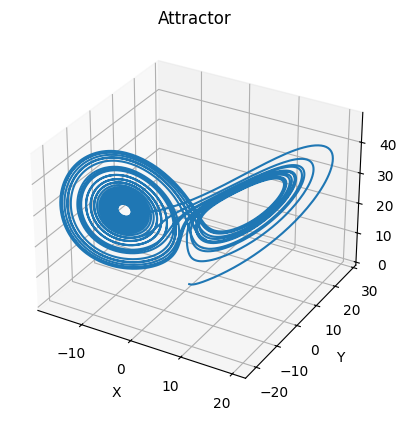

In [7]:
# Plot the Lorenz attractor
dl.plot_lorenz(xyz)

In [8]:
new_lorenz = np.transpose(xyz)

In [9]:
import sklearn.linear_model

def reconstruction_score(x, y):

    def _linear_fitting(x, y):
        lin_model = sklearn.linear_model.LinearRegression()
        lin_model.fit(x, y)
        return lin_model.score(x, y), lin_model.predict(x)

    return _linear_fitting(x, y)

## 3-D Comparison

Here we plot the lorenz attractor and the 3D embedding of it produced by CEBRA.

In [10]:
cebra_model, cebra_embedding = base_embed(input=new_lorenz, temp=0.001,dimension=3, lr=0.01, d=1)

pos:  nan neg:  nan total:  nan temperature:  0.0000: 100%|██████████| 2000/2000 [00:19<00:00, 102.41it/s]


In [11]:
cebra_score, transformed_embedding = reconstruction_score(cebra_embedding,new_lorenz)

<Axes3D: title={'center': 'Transformed CEBRA Embedding:0.883'}>

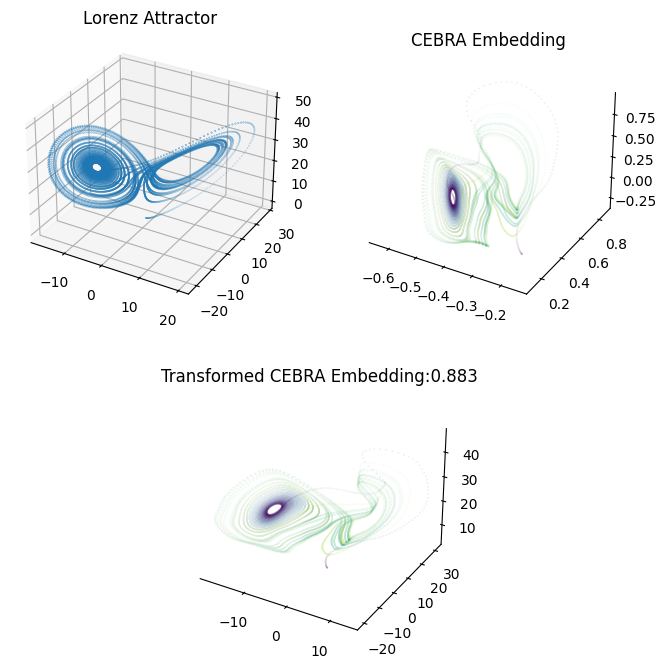

In [12]:
# define grid
fig0 = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 2, figure=fig0)


# make a plot of the 2 PCs of the object
ax0 = fig0.add_subplot(gs[0,0], projection='3d')
ax0.scatter(new_lorenz[:,0], new_lorenz[:,1],new_lorenz[:,2], s=0.07)
ax0.set_title('Lorenz Attractor')

# plot the cebra embedding
ax1 = fig0.add_subplot(gs[0,1], projection='3d')         
cebra.plot_embedding(embedding=cebra_embedding, embedding_labels='time',ax=ax1,cmap='cool', markersize=0.001, alpha=1, title='CEBRA Embedding')

ax2 = fig0.add_subplot(gs[1,:], projection='3d')
cebra.plot_embedding(embedding=transformed_embedding, embedding_labels='time',ax=ax2,cmap='cool', markersize=0.001, alpha=1, title='Transformed CEBRA Embedding:{}'.format(np.round(cebra_score, 3)))



## 2D Comparison

Here we plot the top 2 Principal Components of the lorenz attractor and compare it to the 2D embedding produced by CEBRA .

Text(0.5, 1.0, 'Lorenz attractor')

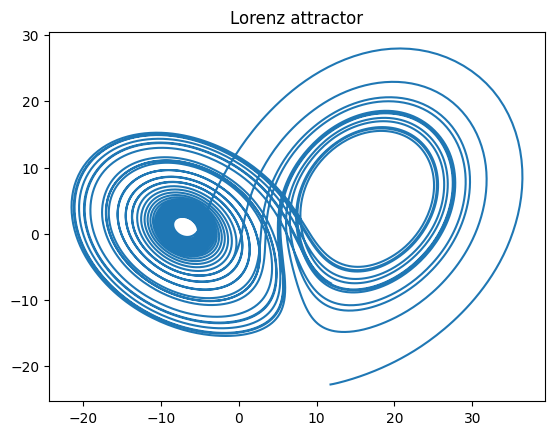

In [62]:
# (input here was the new lorenz attractor itself)

# make a pca model and fit on the object
pca = PCA(n_components=2)

# compute the PCs and get the explained variance
object_pca = pca.fit_transform(new_lorenz)

plt.plot(object_pca[:,0], object_pca[:,1])
plt.title("Lorenz attractor")



In [63]:
cebra_model2, cebra_embedding2 = base_embed(input=new_lorenz, temp=0.001,dimension=2, lr=0.01, d=0.1)

  0%|          | 0/2000 [00:00<?, ?it/s]

pos:  nan neg:  nan total:  nan temperature:  0.0000: 100%|██████████| 2000/2000 [00:19<00:00, 103.37it/s]


In [64]:
cebra_score2, transformed_embedding2 = reconstruction_score(cebra_embedding2,new_lorenz)

In [65]:
print(cebra_score2)
print(cebra_score)

0.7290866089103755
0.8825725108086783


In [66]:
print(new_lorenz.shape)
print(cebra_embedding2.shape)
print(transformed_embedding2.shape)

(10000, 3)
(10000, 2)
(10000, 3)


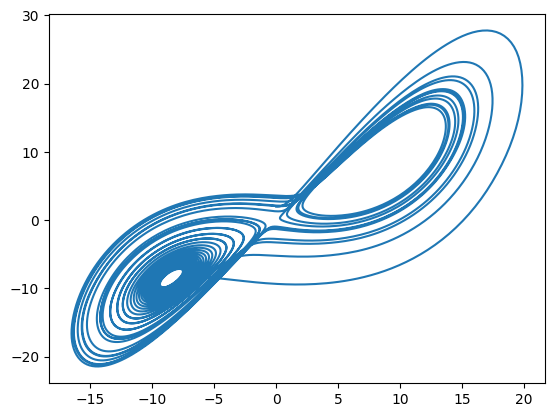

In [67]:
plt.plot(new_lorenz[:,0], new_lorenz[:,1])

<Axes: title={'center': 'CEBRA Embedding'}>

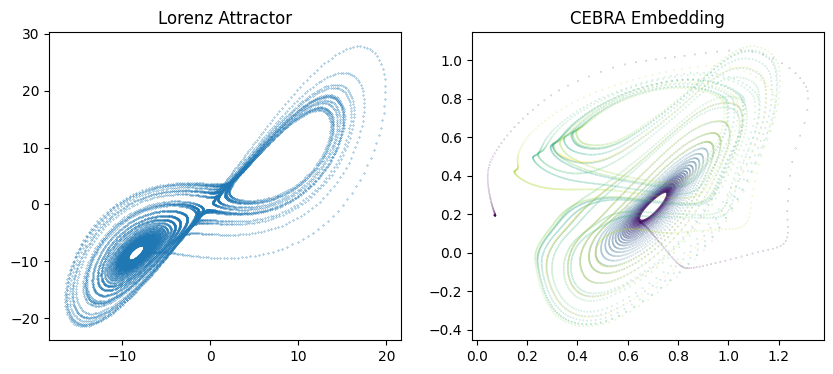

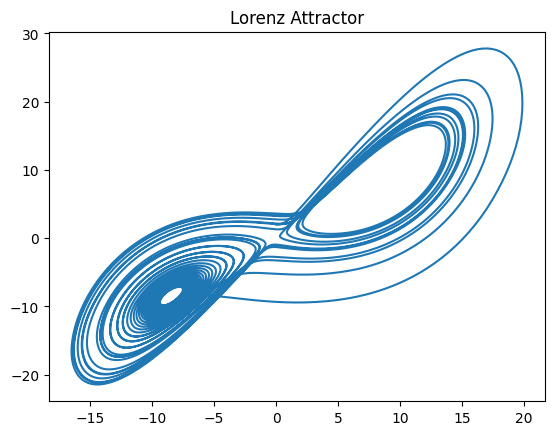

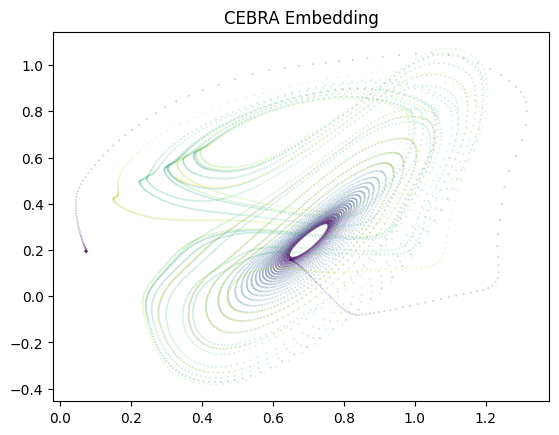

In [68]:
# define grid
fig0_ = plt.figure(figsize=(10,4))
gs_ = gridspec.GridSpec(1, 2, figure=fig0_)


# make a plot of the 2 PCs of the object
ax0_ = fig0_.add_subplot(gs_[0,0])
ax0_.scatter(new_lorenz[:,0], new_lorenz[:,1], s=0.07)
ax0_.set_title('Lorenz Attractor')

# plot the cebra embedding
ax1_ = fig0_.add_subplot(gs_[0,1])         
ax_ = cebra.plot_embedding(embedding=cebra_embedding2, embedding_labels='time',ax=ax1_,cmap='cool', markersize=0.01, alpha=1, title='CEBRA Embedding')


# separate version
fig_new = plt.figure()
plt.plot(new_lorenz[:,0], new_lorenz[:,1])
plt.title('Lorenz Attractor')

fig2_new = plt.figure()
ax_new = fig2_new.add_subplot()
cebra.plot_embedding(embedding=cebra_embedding2, embedding_labels='time',ax=ax_new,cmap='cool', markersize=0.01, alpha=1, title='CEBRA Embedding')
